In [25]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add latitudes and longitudes to list
coordinates = list(lat_lngs)

In [4]:
# Use citipy module to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Create list for holding cities
cities = []

# Identify nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, add it to cities list
    if city not in cities:
        cities.append(city)

# Print city count to confirm sufficient count
len(cities)

584

In [10]:
# Import requests library
import requests

# Import API key
from config import weather_api_key

In [11]:
# Starting URL for OpenWeatherMap API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [12]:
# Import time library and datetime module from datetime library
import time
from datetime import datetime

In [15]:
# Create empty list to hold weather data
city_data = []

# Print beginning of logging
print("Beginning Data Retrieval")
print("--------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities in list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log URL, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to record count
    record_count += 1
    
    # Run API request for each city
    try:
        
        # Parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append city information into city_data list
        city_data.append({
            "City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})
    
    # If an error is experienced, skip city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate data loading is complete
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | palmer
Processing Record 3 of Set 1 | rabak
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | sept-iles
Processing Record 6 of Set 1 | beyneu
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | alotau
City not found. Skipping...
Processing Record 9 of Set 1 | parthenay
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | la tuque
Processing Record 15 of Set 1 | gravdal
Processing Record 16 of Set 1 | yulara
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | saint anthony
Processing Record 20 of Set 1 | kawana waters
City not found. Skipping...
Processing Record 21 of Set 1 | sur
Processing Record 22 of Set 1 | vaini
Proces

City not found. Skipping...
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | kloulklubed
Processing Record 43 of Set 4 | waitati
Processing Record 44 of Set 4 | lanchyn
Processing Record 45 of Set 4 | scarisoara
Processing Record 46 of Set 4 | mandla
Processing Record 47 of Set 4 | luwuk
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | west bay
Processing Record 2 of Set 5 | port-cartier
Processing Record 3 of Set 5 | poronaysk
Processing Record 4 of Set 5 | celestun
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | puerto escondido
Processing Record 7 of Set 5 | morondava
Processing Record 8 of Set 5 | jega
Processing Record 9 of Set 5 | vila velha
Processing Record 10 of Set 5 | zhezkazgan
Processing Record 11 of Set 5 | manitouwadge
Processing Record 12 of Set 5 | boyuibe
Processing Record 13 of Set 5 | ostrovnoy

Processing Record 27 of Set 8 | salta
Processing Record 28 of Set 8 | kirakira
Processing Record 29 of Set 8 | bandarbeyla
Processing Record 30 of Set 8 | giresun
Processing Record 31 of Set 8 | itoman
Processing Record 32 of Set 8 | guadalupe y calvo
Processing Record 33 of Set 8 | jahrom
City not found. Skipping...
Processing Record 34 of Set 8 | udachnyy
Processing Record 35 of Set 8 | ocos
Processing Record 36 of Set 8 | beira
Processing Record 37 of Set 8 | tezu
Processing Record 38 of Set 8 | dongzhen
Processing Record 39 of Set 8 | san patricio
Processing Record 40 of Set 8 | faanui
Processing Record 41 of Set 8 | lishan
Processing Record 42 of Set 8 | calca
Processing Record 43 of Set 8 | barda
Processing Record 44 of Set 8 | haines junction
Processing Record 45 of Set 8 | coquimbo
Processing Record 46 of Set 8 | cape elizabeth
City not found. Skipping...
Processing Record 47 of Set 8 | swift current
Processing Record 48 of Set 8 | zhifang
Processing Record 49 of Set 8 | jamsa


City not found. Skipping...
Processing Record 12 of Set 12 | tessalit
Processing Record 13 of Set 12 | nazare
Processing Record 14 of Set 12 | beringovskiy
Processing Record 15 of Set 12 | saravena
Processing Record 16 of Set 12 | lodja
Processing Record 17 of Set 12 | papillion
Processing Record 18 of Set 12 | jacareacanga
Processing Record 19 of Set 12 | maceio
Processing Record 20 of Set 12 | izhmorskiy
Processing Record 21 of Set 12 | kongoussi
Processing Record 22 of Set 12 | anadyr
Processing Record 23 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 24 of Set 12 | rivne
Processing Record 25 of Set 12 | chiredzi
Processing Record 26 of Set 12 | mount isa
Processing Record 27 of Set 12 | jalu
Processing Record 28 of Set 12 | rawson
Processing Record 29 of Set 12 | naze
Processing Record 30 of Set 12 | de panne
Processing Record 31 of Set 12 | watsa
Processing Record 32 of Set 12 | waddan
Processing Record 33 of Set 12 | dunmore east
Processing Record 34 of Set 1

In [16]:
# Tally number of cities in city_data
print(len(city_data))

532


In [17]:
# Convert array of dictionaries to Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,76.12,76,40,12.66,US,2022-03-08 20:34:18
1,Palmer,42.1584,-72.3287,44.15,30,20,13.80,US,2022-03-08 20:34:19
2,Rabak,13.1809,32.7400,89.46,12,69,10.60,SD,2022-03-08 20:34:19
3,Yellowknife,62.4560,-114.3525,3.42,72,20,17.00,CA,2022-03-08 20:33:30
4,Sept-Iles,50.2001,-66.3821,28.92,63,75,20.71,CA,2022-03-08 20:34:15
5,Beyneu,45.3167,55.2000,35.13,69,35,14.70,KZ,2022-03-08 20:34:20
6,Chokurdakh,70.6333,147.9167,-29.33,100,100,0.85,RU,2022-03-08 20:33:13
7,Parthenay,46.6667,-0.4167,45.95,97,97,8.68,FR,2022-03-08 20:34:21
8,Hilo,19.7297,-155.0900,80.33,63,0,9.22,US,2022-03-08 20:32:24
9,Dikson,73.5069,80.5464,-28.10,100,82,7.20,RU,2022-03-08 20:34:22


In [18]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-03-08 20:34:18,22.0752,-159.3190,76.12,76,40,12.66
1,Palmer,US,2022-03-08 20:34:19,42.1584,-72.3287,44.15,30,20,13.80
2,Rabak,SD,2022-03-08 20:34:19,13.1809,32.7400,89.46,12,69,10.60
3,Yellowknife,CA,2022-03-08 20:33:30,62.4560,-114.3525,3.42,72,20,17.00
4,Sept-Iles,CA,2022-03-08 20:34:15,50.2001,-66.3821,28.92,63,75,20.71


In [19]:
# Create output CSV file
output_data_file = "Weather_Data/cities.csv"

# Export DF into CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [20]:
# Extract relevant fields from DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

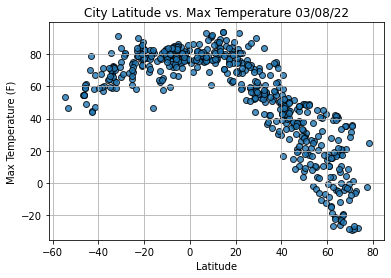

In [26]:
# Build scatterplot for latitude vs. max temp
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add other graph formatting
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig1.png")

# Show plot
plt.show()

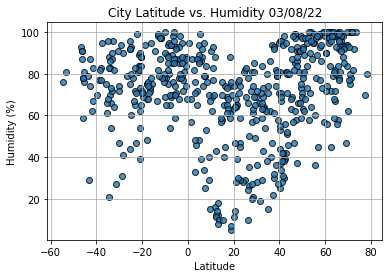

In [28]:
# Build scatterplot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add other graph formatting
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig2.png")

# Show plot
plt.show()

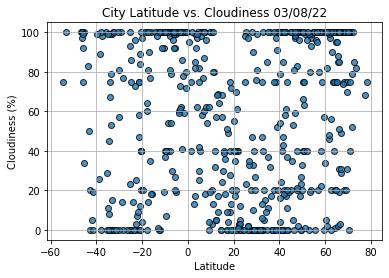

In [29]:
# Build scatterplot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add other graph formatting
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig3.png")

# Show plot
plt.show()

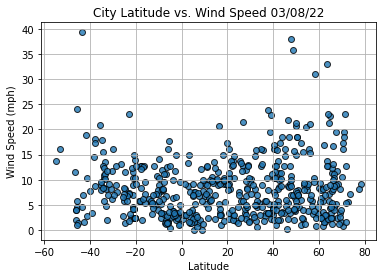

In [30]:
# Build scatterplot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add other graph formatting
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Data/Fig4.png")

# Show plot
plt.show()